(500, 1, 1)


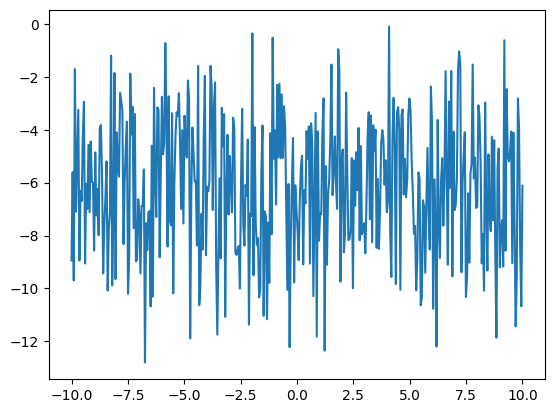

In [140]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

class TimeSeries:
    

    def generate_time_series(self,batch_size, n_steps):
        freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
        time = np.linspace(0,1, n_steps)
        series = 0.5*np.sin((time - offset1))*(freq1*10+10) # Welle 1
        series += 0.2*np.sin((time - offset2))*(freq2*20+20) # Welle 2
        series += 0.1*(np.random.rand(batch_size, n_steps)-0.5) # Rauschen
        return series[..., np.newaxis].astype(np.float32)

timeseries = TimeSeries()

series = timeseries.generate_time_series(500, 1)
print(np.shape(series))
x = np.linspace(-10,10,400)
fig = plt.figure()
plt.plot(x, series[0:400,0,0], '-')


plt.show()


In [143]:
n_steps = 50
class_ts = TimeSeries()
series = class_ts.generate_time_series(10000, n_steps +1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [31]:
print("np.shape(X_train), np.shape(X_valid), np.shape(X_test) ",
      np.shape(X_train), np.shape(X_valid), np.shape(X_test))
print("np.shape(Y_train), np.shape(Y_valid), np.shape(Y_test) ",
      np.shape(y_train), np.shape(y_valid), np.shape(y_test))


np.shape(X_train), np.shape(X_valid), np.shape(X_test)  (7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
np.shape(Y_train), np.shape(Y_valid), np.shape(Y_test)  (7000, 1) (2000, 1) (1000, 1)


In [42]:
import tensorflow as tf
from tensorflow import keras
print("tf.__version__ ",tf.__version__)
print("keras.__version__ ",keras.__version__)
print("y_pred = X_valid[:,-1]", X_valid[:,-1])
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

tf.__version__  2.9.0
keras.__version__  2.9.0
y_pred = X_valid[:,-1] [[5.4711876]
 [5.7718506]
 [2.0045907]
 ...
 [4.3813   ]
 [7.8786697]
 [4.0642567]]


0.055597506

In [144]:
print(np.shape(X_valid),np.shape(y_valid))
print(np.shape(series))

(2000, 50, 1) (2000, 1)
(10000, 51, 1)


In [225]:
print(np.shape(series[0:7,:50,0]))

(7, 50)


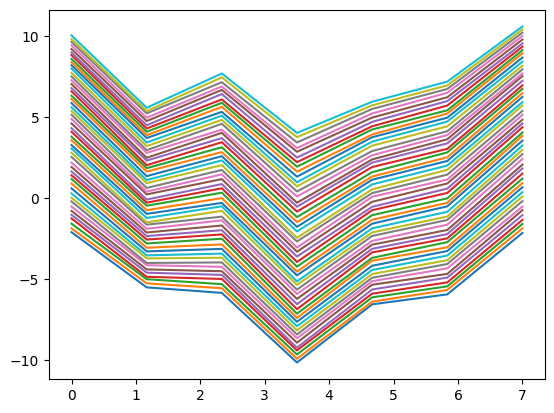

In [228]:

x = np.linspace(0,7,7)
#print(x)
fig = plt.figure()
plt.plot(x, series[0:7,:50,0], '-')
plt.show()

In [70]:
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)])

In [71]:
model.summary()
model.layers



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


'flatten_1'

In [72]:
model.compile(loss="MSE", optimizer="Adam", metrics=["mse"])

In [74]:
history = model.fit(X_train,y_train, epochs = 20,
                   validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/20
219/219 [==============================] - 0s 778us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/20
219/219 [==============================] - 0s 700us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/20
219/219 [==============================] - 0s 692us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/20
219/219 [==============================] - 0s 692us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/20
219/219 [==============================] - 0s 719us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/20
219/219 [==============================] - 0s 720us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 7/20
219/219 [==============================] - 0s 736us/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/20
219/219 [==============================] - 0s 774us

<function matplotlib.pyplot.show(close=None, block=None)>

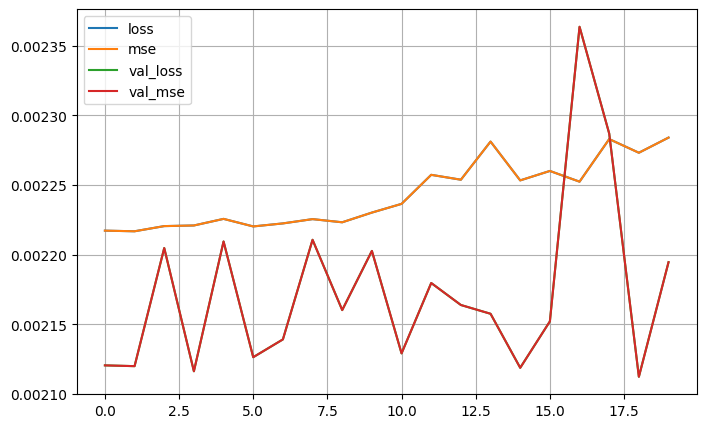

In [77]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) # verticaklen Bereich auf o 1 setzen
plt.show

In [78]:
model = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None,1])])

In [81]:
model.compile(loss="MSE", optimizer="Adam", metrics=["mse"])

In [84]:
model.summary()
model.layers



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(X_train,y_train, epochs = 20,
                   validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3640 - mse: 33.3640 - val_loss: 33.5507 - val_mse: 33.5507
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3639 - mse: 33.3639 - val_loss: 33.5505 - val_mse: 33.5505
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3637 - mse: 33.3637 - val_loss: 33.5504 - val_mse: 33.5504
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3636 - mse: 33.3636 - val_loss: 33.5503 - val_mse: 33.5503
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3635 - mse: 33.3635 - val_loss: 33.5502 - val_mse: 33.5502
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3634 - mse: 33.3634 - val_loss: 33.5501 - val_mse: 33.5501
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 33.3633 - mse: 33.3633 - val_loss: 33.5500 - val_mse: 33.5500
Epoch 8/20
219/219 [============================

In [100]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(200, return_sequences = True, input_shape=[None,1]),
    keras.layers.SimpleRNN(200, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

In [101]:
model.summary()
model.layers

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 200)         40400     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 200)         80200     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1)                 202       
                                                                 
Total params: 120,802
Trainable params: 120,802
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss="MAE", optimizer="Adam", metrics=["accuracy","mse"])

In [103]:
history = model.fit(X_train,y_train, epochs = 20,
                   validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/20
219/219 [==============================] - 5s 20ms/step - loss: 5.1907 - accuracy: 0.0000e+00 - mse: 33.3752 - val_loss: 5.2280 - val_accuracy: 0.0000e+00 - val_mse: 33.5508
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 5.1879 - accuracy: 0.0000e+00 - mse: 33.3636 - val_loss: 5.2280 - val_accuracy: 0.0000e+00 - val_mse: 33.5508
Epoch 3/20
219/219 [==============================] - 4s 20ms/step - loss: 5.1879 - accuracy: 0.0000e+00 - mse: 33.3636 - val_loss: 5.2280 - val_accuracy: 0.0000e+00 - val_mse: 33.5508
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 5.1879 - accuracy: 0.0000e+00 - mse: 33.3636 - val_loss: 5.2280 - val_accuracy: 0.0000e+00 - val_mse: 33.5508
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 5.1879 - accuracy: 0.0000e+00 - mse: 33.3636 - val_loss: 5.2280 - val_accuracy: 0.0000e+00 - val_mse: 33.5508
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

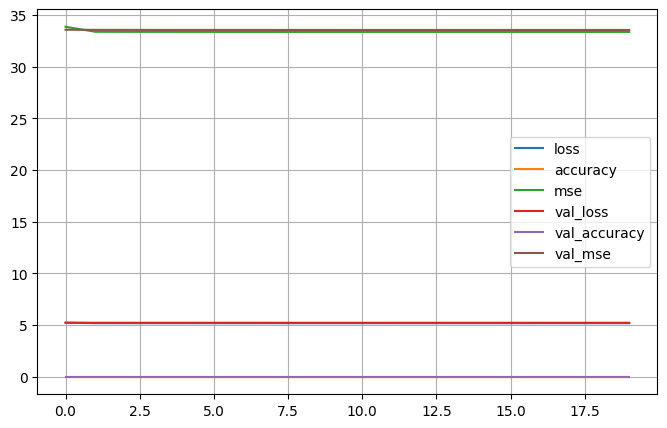

In [99]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) # verticaklen Bereich auf o 1 setzen
plt.show